### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19


## Player Count

* Display the total number of players


In [2]:
total_players = len(purchase_data["SN"].value_counts())
total_players

576

In [15]:
players = {"Players": [total_players]}
Player_total = pd.DataFrame(players)
Player_total

,Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [14]:
#unique items use Item ID, average price use Price, number of purchases use Purchase ID

unique_items = len(purchase_data["Item ID"].unique())
print(unique_items)
average_price = purchase_data["Price"].mean()
print(average_price)
number_of_purchases = len(purchase_data["Purchase ID"].value_counts())
print(number_of_purchases)
total_rev = purchase_data["Price"].sum()
total_rev

183
3.0509871794871795
780


2379.77

In [16]:
Purchase = {"Items": [unique_items], "Average": [average_price], "Purchases": [number_of_purchases],
                    "Revenue": [total_rev]}
purchase_df = pd.DataFrame(Purchase)
purchase_df

purchase_df.style.format({'Average':"${:,.2f}",
                         'Revenue': '${:,.2f}'})

,Items,Average,Purchases,Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [29]:
gen = purchase_data.groupby("Gender")
gender_count = gen.nunique()["SN"]   #df.groupby("A").nunique()
print(gender_count)


#Percentage
#players = {"Players": [total_players]}
#Player_total = pd.DataFrame(players)
#Player_total

gender_percent = gender_count/total_players * 100
print(gender_percent)

Gender
Female                    81
Male                     484
Other / Non-Disclosed     11
Name: SN, dtype: int64
Gender
Female                   14.062500
Male                     84.027778
Other / Non-Disclosed     1.909722
Name: SN, dtype: float64


In [34]:
gender_demo = {"Total Count": gender_count, "Percentage of Players": gender_percent}
Demo = pd.DataFrame(gender_demo)
Demo

Demo.style.format({"Percentage of Players":"{:,.2f}%"})

,Total Count,Percentage of Players
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [18]:
gen = purchase_data.groupby("Gender")

purchase_count =  gen["Purchase ID"].count()
print(purchase_count)
avg_purchase_price = gen["Price"].mean()
print(avg_purchase_price)

total_avg_purchase = gen["Price"].sum()
print(total_avg_purchase)

#gender_count = gen.nunique()["SN"]
#Avg purchase total per person by gender
per_person = total_avg_purchase/gender_count
print(per_person)

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: Purchase ID, dtype: int64
Gender
Female                   3.203009
Male                     3.017853
Other / Non-Disclosed    3.346000
Name: Price, dtype: float64
Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64
Gender
Female                   4.468395
Male                     4.065372
Other / Non-Disclosed    4.562727
dtype: float64


In [14]:
gen_analysis = {"Purchase Count": purchase_count, "Average Purchase Price": avg_purchase_price, "Total Purchase Value":total_avg_purchase, "Avg. Purchase Total per Person": per_person}
gender_purchase_analysis = pd.DataFrame(gen_analysis)

gender_purchase_analysis

gender_purchase_analysis.style.format({"Average Purchase Price":"${:,.2f}","Total Purchase Value":"${:,.2f}", "Avg. Purchase Total per Person":"${:,.2f}"})

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg. Purchase Total per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [63]:
age_bins = [0,9,14,19,24,29,34,39,100]
age_groups =["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

pd.cut(purchase_data["Age"], age_bins, labels=age_groups)

purchase_data["Age Groups"] = pd.cut(purchase_data["Age"], age_bins, labels=age_groups)
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Groups
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24
...,...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54,20-24
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63,20-24
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46,20-24
778,778,Sisur91,7,Male,101,Final Critic,4.19,<10


In [70]:
#Purchase count by age

grouped_age = purchase_data.groupby("Age Groups")
# age_counts = grouped_age["SN"].unique()
age_counts = grouped_age["SN"].nunique()
age_counts

#Percentage
age_percent = age_counts/total_players * 100
age_percent

age_demo = {"Total Counts":age_counts, "Percentage":age_percent}

Age_Demographics = pd.DataFrame(age_demo)
Age_Demographics.style.format({"Percentage":"{:,.2f}"})

,Total Counts,Percentage
Age Groups,,
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [76]:
grouped_age = purchase_data.groupby("Age Groups")
age_counts = grouped_age["SN"].nunique()
age_counts

#Purchase Count
purchase_count = grouped_age["Purchase ID"].count()

#Avg purchase price
purchase_price = grouped_age["Price"].mean()

#Purchase total per person
purchase_total = grouped_age["Price"].sum()

#Avg per person
avg_purchase_person = purchase_total/age_counts

age_analysis = {"Purchase Count":purchase_count, "Avg Purchase Price":purchase_price, "Total Purchase Value":purchase_total, "Avg Total per Person":avg_purchase_person}

purchase_analysis_age = pd.DataFrame(age_analysis)
purchase_analysis_age

purchase_analysis_age.style.format({"Purchase Count":"${:,.2f}","Avg Purchase Price":"${:,.2f}", "Total Purchase Value":"${:,.2f}", "Avg Total per Person":"${:,.2f}"})

,Purchase Count,Avg Purchase Price,Total Purchase Value,Avg Total per Person
Age Groups,,,,
<10,$23.00,$3.35,$77.13,$4.54
10-14,$28.00,$2.96,$82.78,$3.76
15-19,$136.00,$3.04,$412.89,$3.86
20-24,$365.00,$3.05,"$1,114.06",$4.32
25-29,$101.00,$2.90,$293.00,$3.81
30-34,$73.00,$2.93,$214.00,$4.12
35-39,$41.00,$3.60,$147.67,$4.76
40+,$13.00,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



* Identify the the top 5 spenders in the game by total purchase value, then list (in a table):
  * SN
  * Purchase Count
  * Average Purchase Price
  * Total Purchase Value

In [26]:
spenders = purchase_data.groupby("SN")

purchase_spenders = spenders["Purchase ID"].count()

avg_purchase_spenders = spenders["Price"].mean()

total_purchase_spenders = spenders["Price"].sum()

In [27]:
top_spenders = {"Purchase Count": purchase_spenders, "Average Purchase Price": avg_purchase_spenders, "Total Purchase Value":total_purchase_spenders}

top_five = pd.DataFrame(top_spenders)

top_five.sort_values(["Total Purchase Value"], ascending=False).head().style.format({"Average Purchase Price":"${:,.2f}", "Total Purchase Value":"${:,.2f}"})


,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.41,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [30]:
item_col = purchase_data[["Item ID", "Item Name", "Price"]]
item_col
items = item_col.groupby(["Item ID", "Item Name"])

In [43]:
# Number of times item was bought
item_purchase_c = items["Price"].count()

# Total purchase value
item_purchase_t = items["Price"].sum()

#Individual item price
item_purchase_p = item_purchase_t/item_purchase_c

popular = {"Purchase Count": item_purchase_c, "Item Price":item_purchase_p, "Total Purchase Value": item_purchase_t}
most_pop = pd.DataFrame(popular)
most_pop

most_pop.sort_values(["Purchase Count"], ascending = False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [47]:
most_pop.sort_values(["Total Purchase Value"], ascending = False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


Create a simple graph (any type) using Matplotlib and any of the data in the dataframe. Briefly explain what the graph shows.

<function matplotlib.pyplot.show(close=None, block=None)>

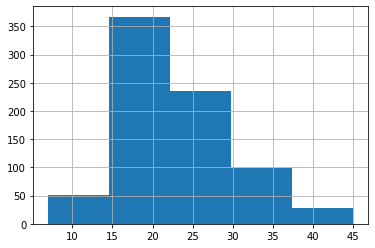

In [60]:
import matplotlib.pyplot as plt

purchase_data["Age"].hist(bins = 5)

plt.show

# This shows that the majority of players are between the ages of 14 - 23

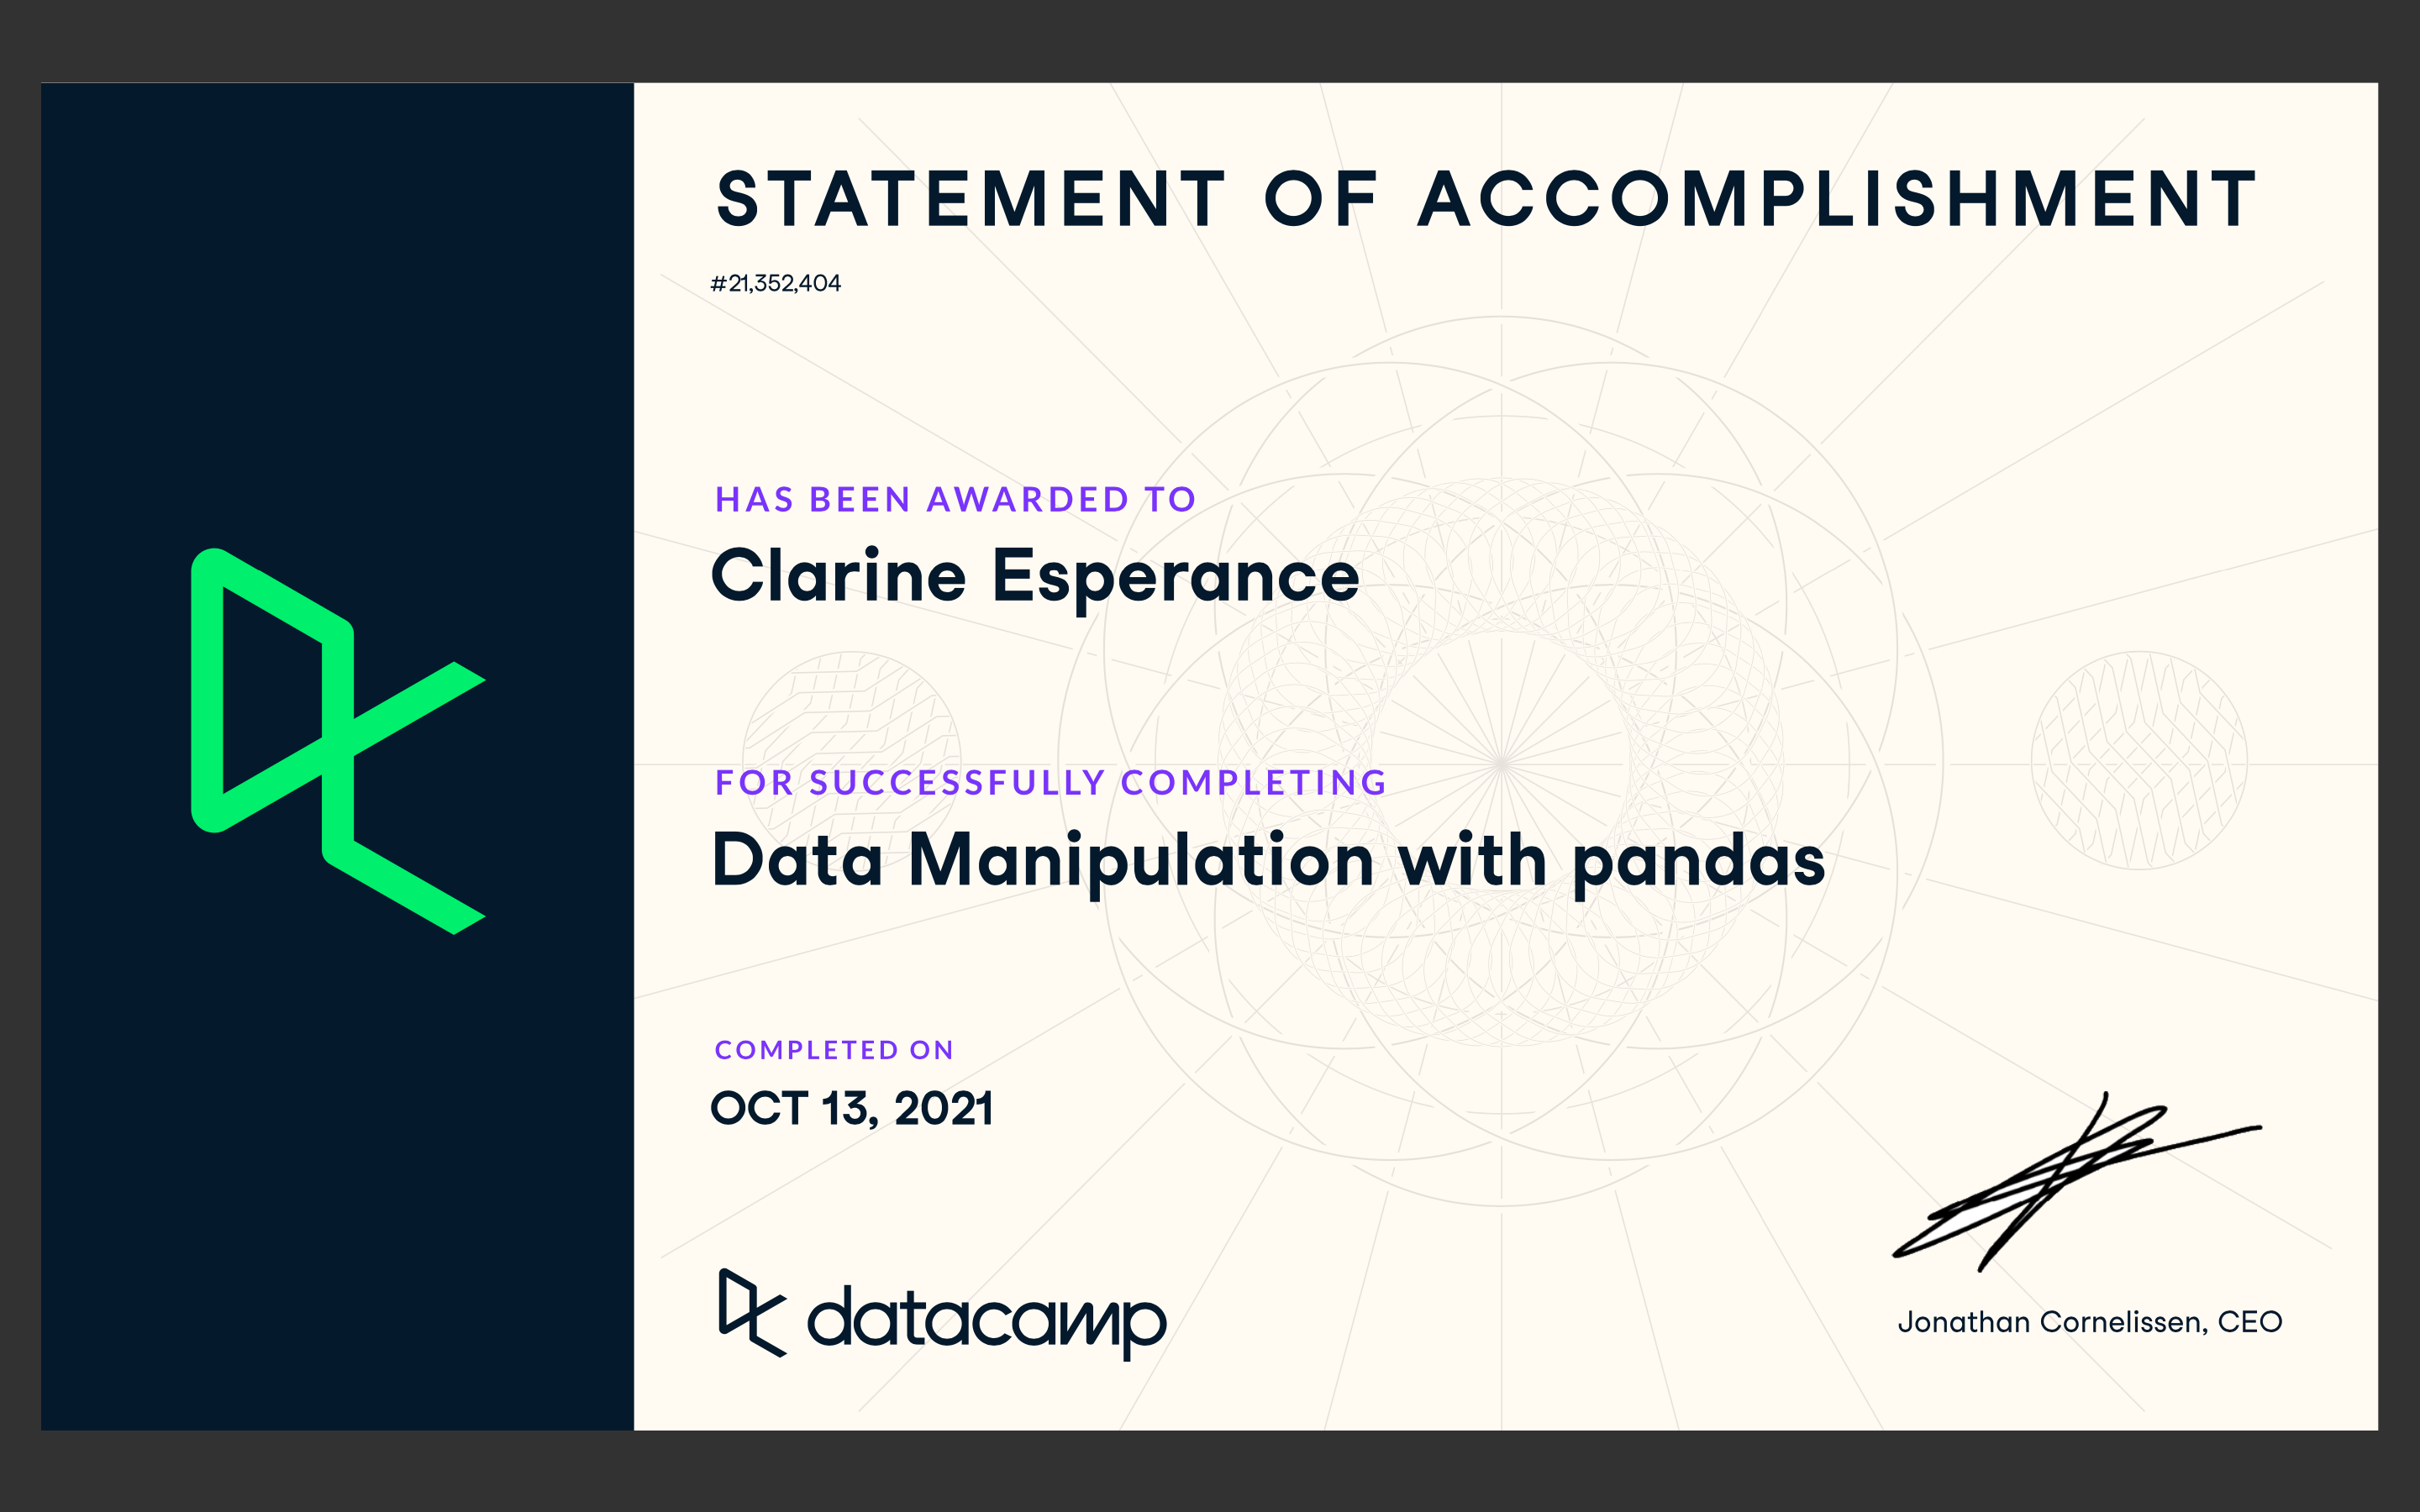